In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [44]:
df = pd.read_csv('/content/prices.csv')

In [45]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [46]:
df.shape

(851264, 7)

In [47]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 52.0+ MB


In [51]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [52]:
df['symbol'].nunique()

501

***There are 501 symbols in the datasets and in total there are 851264 rows with 7 columns***  
***Data set is good for analysis. however, since there are many company details are there. we will sample it with one Company***

In [53]:
le = LabelEncoder()
le.fit(df['symbol'])
df['symbol'] = le.transform(df['symbol'].values)

df.head()

LabelEncoder()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,479,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,479,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,479,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,479,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,479,117.010002,114.970001,114.089996,117.330002,1408600.0


In [54]:
df['date']=pd.to_datetime(df['date'])

In [55]:
print("Minimum date value : {}".format(df['date'].min()))
print("Maximum date value : {}".format(df['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


***we have around 6 years of data***

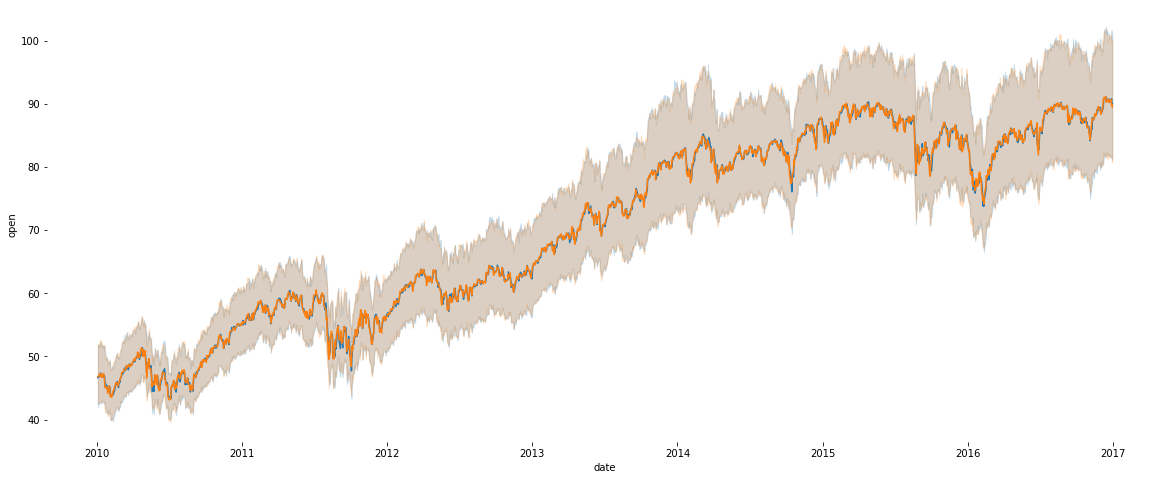

In [56]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df, x='date',y='open')
ax=sns.lineplot(data=df, x='date',y='close');
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

#plt.title("AMAZON Stock value changes since 2010", size=20, weight='bold')

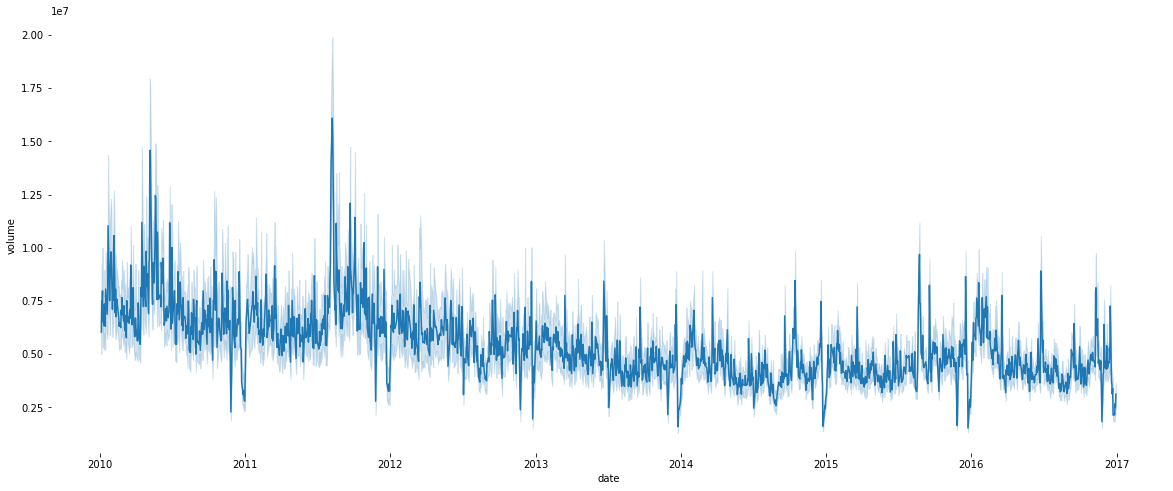

In [57]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df, x='date',y='volume')
#ax=sns.lineplot(data=df1, x='date',y='close');
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
#plt.title("Google Stock volume", size=20, weight='bold')

***There seems to be ouliers in the data set, however, those values can't be considered as outlier as they may be extrem values during peak selling days***  
***Date column has been ingored as it is series of numbers***  
Let us analyse more for conclusion

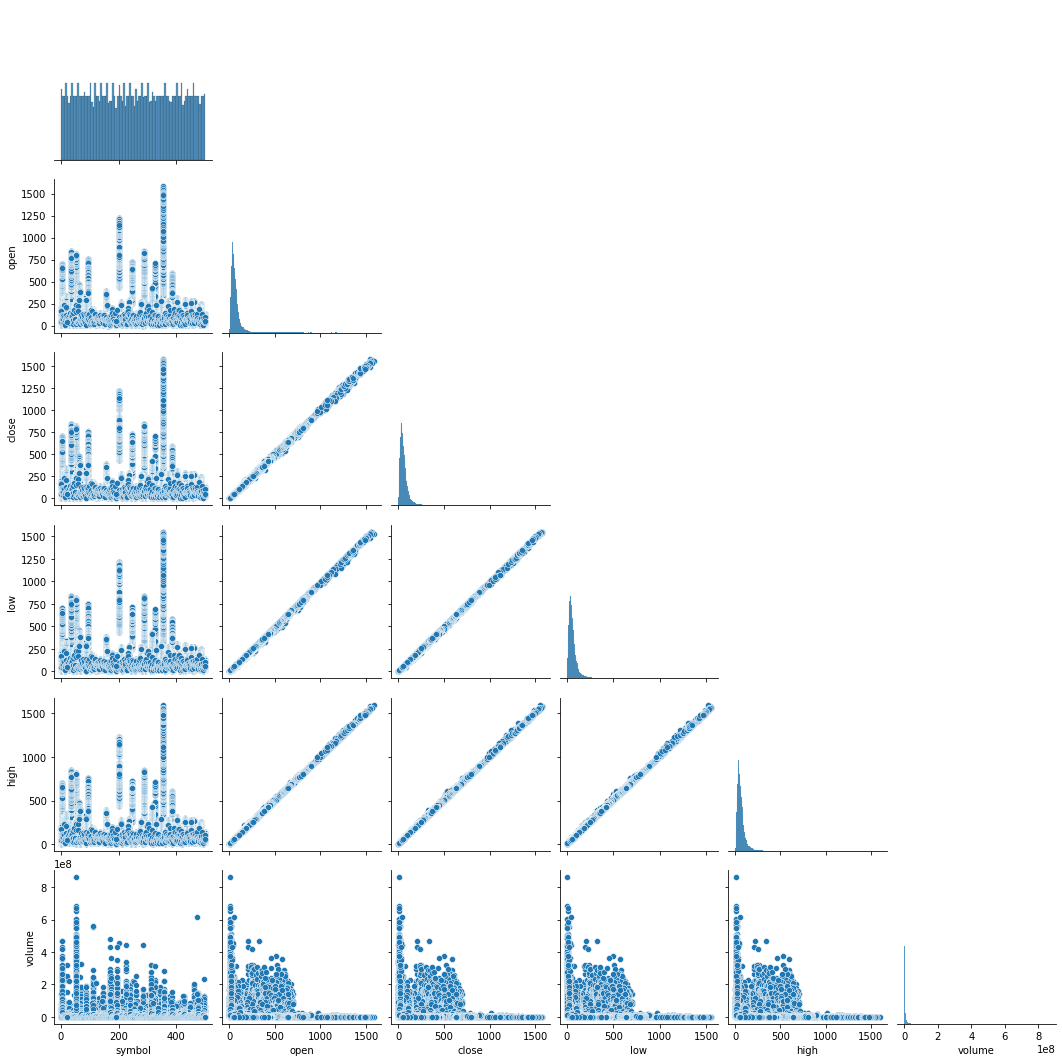

In [58]:
# we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable. 
sns.pairplot(df,corner=True)

In [59]:
df.corr()['close']

symbol   -0.055524
open      0.999849
close     1.000000
low       0.999928
high      0.999927
volume   -0.060154
Name: close, dtype: float64

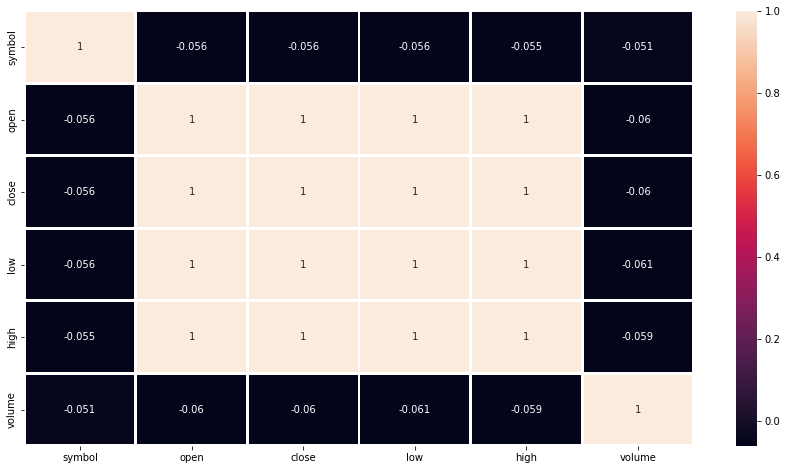

In [60]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidth=2 )

***feature Open, high, low are highly correlated to Target feature Close. we can use either one of the feature for prediction to avoid multicollinearity***

In [61]:
X=df[['volume','open']]
y=df['close']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [63]:
X_train.shape
y_train.shape

(595884, 2)

(595884,)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [65]:
no_of_samples_tr = X_train.shape[0]
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr    

In [66]:
no_of_samples_test = X_test.shape[0]          
input_features = X_test.shape[1]             
channels = 1
batch_size_test = no_of_samples_test

In [67]:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [68]:
train.shape  
test.shape 

(595884, 2, 1)

(255380, 2, 1)

In [69]:
inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])  
                        )

In [70]:
x_left = layers.Conv1D(
                       filters = 16,
                       kernel_size=2,
                       activation='relu'
                       )(inputs)
x_rt = layers.Conv1D(
                      filters = 16,
                      kernel_size=2,
                      activation='relu'
                    )(inputs)
x = tf.keras.layers.concatenate([x_left,x_rt])

In [71]:
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [72]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [73]:
model = Model(inputs = [inputs], outputs = [out])

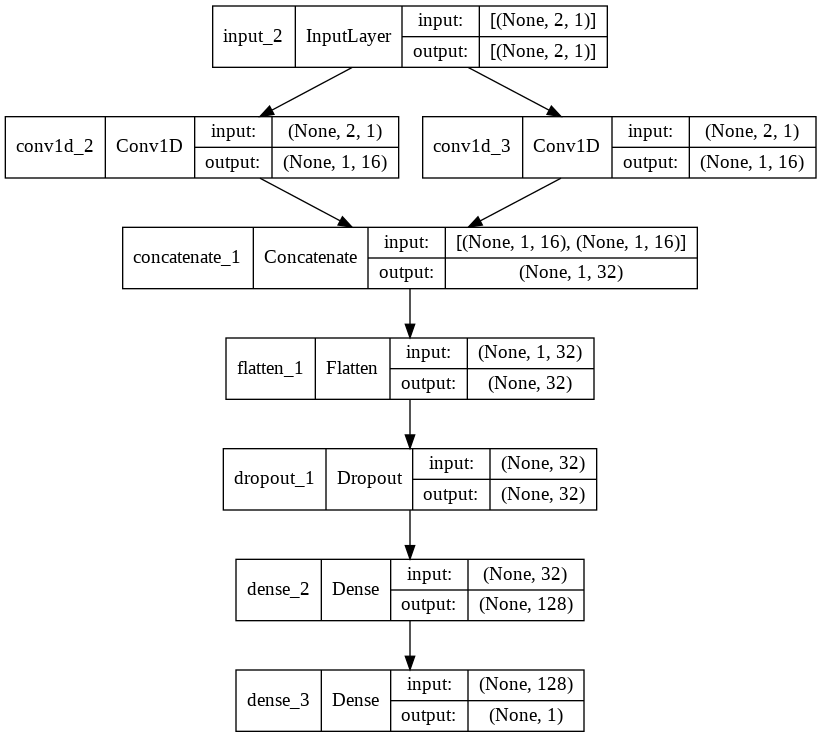

In [74]:
plot_model(model, show_shapes= True)

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2, 1)]       0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 1, 16)        48          ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 1, 16)        48          ['input_2[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 32)        0           ['conv1d_2[0][0]',               
                                                                  'conv1d_3[0][0]']         

In [76]:
model.compile(
               optimizer = 'adam',
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy']
               )

In [77]:
history = model.fit(
                    train,
                    y_train,
                    epochs = 20,
                    verbose = 1
                    )

Epoch 1/20
18622/18622 [==============================] - 83s 4ms/step - loss: -707597184.0000 - accuracy: 1.6782e-06
Epoch 2/20
18622/18622 [==============================] - 82s 4ms/step - loss: -7927204864.0000 - accuracy: 1.6782e-06
Epoch 3/20
18622/18622 [==============================] - 82s 4ms/step - loss: -30131142656.0000 - accuracy: 1.6782e-06
Epoch 4/20
18622/18622 [==============================] - 89s 5ms/step - loss: -75447230464.0000 - accuracy: 1.6782e-06
Epoch 5/20
18622/18622 [==============================] - 82s 4ms/step - loss: -151874732032.0000 - accuracy: 1.6782e-06
Epoch 6/20
18622/18622 [==============================] - 105s 6ms/step - loss: -267536891904.0000 - accuracy: 1.6782e-06
Epoch 7/20
18622/18622 [==============================] - 90s 5ms/step - loss: -431285108736.0000 - accuracy: 1.6782e-06
Epoch 8/20
18622/18622 [==============================] - 82s 4ms/step - loss: -651151802368.0000 - accuracy: 1.6782e-06
Epoch 9/20
18622/18622 [==============

In [79]:
model.evaluate(test,y_test)

7981/7981 [==============================] - 24s 3ms/step - loss: -11577243729920.0000 - accuracy: 7.8315e-06


[-11577243729920.0, 7.831466973584611e-06]